# Análise de Performance dos Times do Brasileirão – Aplicando Moneyball



## 1.  Escopo do Projeto
- Quais times têm o melhor desempenho em casa e fora? ✅
- Existe correlação entre número de faltas e vitórias?

---

## 2. Obter os Dados
Você pode coletar dados do Brasileirão de diversas fontes:
- **APIs**:**Sofascore**. ✅
- **Scraping de Sites**: **FBref** e **Transfermarkt**. ✅

### Dados recomendados:
- **Resultados dos Jogos**: Time mandante, visitante, gols, data.✅
- **Estatísticas dos Jogos**: Posse de bola, finalizações, escanteios, cartões.

---

## 3. Processamento e Limpeza dos Dados
- Verificar dados faltantes ou inconsistentes.
- Criar colunas novas, como:
  - **Saldo de gols**: Gols feitos - Gols sofridos.✅
  - **Média de pontos em casa e fora**.✅
---

## 4. Análises Exploratórias e Visualizações
Aqui estão algumas ideias de análises:

### 4.1. Desempenho dos Times
- Comparar desempenho em casa e fora de cada time. ✅

---

### 4.2. Análise de Gols
- Qual time tem a maior média de gols?
---

### 4.3. Fair Play
- Comparar cartões recebidos entre os times.✅
- Verificar a correlação entre número de cartões e resultados.✅

**Gráfico sugerido:** Scatter plot mostrando a correlação entre cartões e pontos.

---


## 5. Modelagem Preditiva (Opcional)
Algumas sugestões para ir além com modelos preditivos:
- **Previsão de Resultados de Partidas**: Usando algoritmos como regressão logística ou XGBoost.
- **Previsão de Pontuação Futura**: Aplicar modelos de séries temporais, como ARIMA.

---

## 6. Ferramentas para Análise
- **Python**: Para análise de dados e visualizações com **Pandas, Matplotlib e Seaborn**.
- **Scikit-learn**: Para criação de modelos preditivos.
- **Streamlit**: Para criar uma interface web interativa com visualizações do campeonato.

## **Escopo do Projeto**

### 1. **Análise Desportiva**
- Desempenho em campo (pontos conquistados, vitórias, empates e derrotas).✅
- Estatísticas ofensivas e defensivas (gols marcados, sofridos, saldo de gols).✅
- Rendimento em casa e fora (performance no estádio como mandante e visitante).✅


### 2. **Análise Financeira**
- Análise de folha salarial vs. desempenho (custo por ponto conquistado).✅
- Comparativo entre orçamento e classificação final.✅






## **Etapas do Projeto**

### 1. **Coleta de Dados**
- **Fontes de dados públicas**: Transfermarkt, SofaScore,Fbref.
- Dados de desempenho esportivo por rodada e renda por jogo.
- Dados financeiros (balanços anuais e relatórios financeiros).

### 2. **Limpeza e Tratamento dos Dados**
- Tratamento de dados faltantes ou inconsistentes.
- Padronização de colunas e formato dos dados para análise.

### 3. **Exploração e Análise de Dados (EDA)**
- Estatísticas descritivas para identificar padrões e comportamentos.
- Gráficos exploratórios para entender as tendências (ex.: desempenho ao longo das rodadas).

### 4. **Modelagem e Clusterização**
- **Clusterização dos clubes** com base em performance e dados financeiros ( K-means).
- **Análise de regressão** para encontrar correlações entre folha salarial e desempenho esportivo.

### 5. **Criação de Indicadores e Visualizações**
- Dashboards interativos com visualização de indicadores (Tableau).
- Gráficos interativos que mostram evolução dos clubes por rodada e comparativo financeiro.
- Indicadores como custo por ponto e eficiência financeira.

### 6. **Conclusões e Recomendações**
- Identificação de quais fatores financeiros e esportivos são mais relevantes para o sucesso.
- Recomendações para clubes sobre alocação de recursos financeiros.

---

## **Ferramentas Utilizadas**
- **Python**: Pandas, NumPy, Matplotlib, Seaborn.
- **Scikit learn**: Kmeans e Regressao Linear.
- **Streamlit**: Para criar uma aplicação web interativa e visualizar os dados.
- **BeautifulSoup**: WebScraping
- **Matplotlib**: visualizar os dados.
- **Seaborn**: visualizar os dados.
- **Google Colab**: Documentação e desenvolvimento do projeto.

---

## **Insights**
- Identificação de clubes que conseguem alto desempenho com orçamentos menores.✅
- Relação entre desempenho esportivo e investimento em contratações.


# Importação de bibliotecas


In [15]:
!pip install adjustText

In [16]:
!pip install fuzzywuzzy

In [17]:
!pip install soccerdata

In [18]:
import soccerdata as sd
import requests
import numpy as np
import matplotlib.pyplot as plt
import random
import unidecode
import seaborn as sns
from sklearn.linear_model import LinearRegression
from fuzzywuzzy import process
from adjustText import adjust_text
from sklearn.cluster import KMeans
import time
import pandas as pd
from bs4 import BeautifulSoup

# 1. Coleta de Dados:

In [19]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [20]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2024)
print(fbref.__doc__)

[10/31/24 18:51:39] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=190878;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=667241;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [21]:
team_season_stats = fbref.read_team_season_stats(stat_type="passing")
team_season_stats.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used 90s  Total               \
                                                        Cmp    Att  Cmp%   
league      season team                                                    
BRA-Serie A 2425   Ath Paranaense             30  30  11002  13903  79.1   
                   Atl Goianiense             40  31  10210  13165  77.6   
                   Atlético Mineiro           35  30  13506  16232  83.2   
                   Bahia                      28  31  14947  17556  85.1   
                   Botafogo (RJ)              37  31  12288  15060  81.6   

                                                    Short              ...  \
                                    TotDist PrgDist   Cmp   Att  Cmp%  ...   
league      season team                                                ...   
BRA-Serie A 2425   Ath Paranaense    207866   74699  4382  5010  87.5  ...   
                   Atl Goianiense    194940   73613  4051  4718  85.9  ...   
                   Atlético Mineiro  241486   81042  5998  6640  90.3  ...   
                   Bahia             254260   86803  6799  7439  91.4  ...   
                   Botafogo (RJ)     228192   84636  4980  5655  88.1  ...   

                                    Ast   xAG Expected         KP   1/3  PPA  \
                                                    xA A-xAG                   
league      season team                                                        
BRA-Serie A 2425   Ath Paranaense    27  30.3     29.8  -3.3  358  1017  265   
                   Atl Goianiense    12  22.8     25.3 -10.8  327  1049  229   
                   Atlético Mineiro  21  21.2     26.5  -0.2  289  1119  240   
                   Bahia             34  32.7     29.9   1.3  324  1139  271   
                   Botafogo (RJ)     33  31.4     30.6   1.6  346  1093  257   

                                    CrsPA  PrgP  \
                                                  
league      season team                           
BRA-Serie A 2425   Ath Paranaense      82  1267   
                   Atl Goianiense      87  1185   
                   Atlético Mineiro    73  1289   
                   Bahia               74  1390   
                   Botafogo (RJ)       73  1285   

                                                                                url  
                                                                                     
league      season team                                                              
BRA-Serie A 2425   Ath Paranaense    /en/squads/2091c619/Athletico-Paranaense-Stats  
                   Atl Goianiense     /en/squads/32d508ca/Atletico-Goianiense-Stats  
                   Atlético Mineiro      /en/squads/422bb734/Atletico-Mineiro-Stats  
                   Bahia                            /en/squads/157b7fee/Bahia-Stats  
                   Botafogo (RJ)              /en/squads/d9fdd9d9/Botafogo-RJ-Stats  

[5 rows x 26 columns]

In [22]:
print(team_season_stats.columns)


MultiIndex([('players_used',        ''),
            (         '90s',        ''),
            (       'Total',     'Cmp'),
            (       'Total',     'Att'),
            (       'Total',    'Cmp%'),
            (       'Total', 'TotDist'),
            (       'Total', 'PrgDist'),
            (       'Short',     'Cmp'),
            (       'Short',     'Att'),
            (       'Short',    'Cmp%'),
            (      'Medium',     'Cmp'),
            (      'Medium',     'Att'),
            (      'Medium',    'Cmp%'),
            (        'Long',     'Cmp'),
            (        'Long',     'Att'),
            (        'Long',    'Cmp%'),
            (         'Ast',        ''),
            (         'xAG',        ''),
            (    'Expected',      'xA'),
            (    'Expected',   'A-xAG'),
            (          'KP',        ''),
            (         '1/3',        ''),
            (         'PPA',        ''),
            (       'CrsPA',        ''),
            (   

In [23]:
sofascore = sd.Sofascore(leagues='BRA-Serie A', seasons='24')
print(sofascore.__doc__)

[10/31/24 18:51:40] INFO     Saving cached data to /root/soccerdata/data/Sofascore                   ]8;id=299964;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=411277;file:///usr/local/lib/python3.10/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data available at http://www.sofascore.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/Sofascore``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of Leagues to include.
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - 'tor': Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
                      'https': 'http://10.10.1.10:1080',
                  }

            - 

In [24]:
clubes_sfs = sofascore.read_league_table()
clubes_sfs.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


team  MP   W   D  L  GF  GA  GD  Pts
league      season                                               
BRA-Serie A 2425         Botafogo  31  19   7  5  49  26  23   64
            2425        Palmeiras  31  18   7  6  53  25  28   61
            2425        Fortaleza  31  16   9  6  41  32   9   57
            2425         Flamengo  31  16   7  8  50  37  13   55
            2425    Internacional  31  14  11  6  42  28  14   53

In [25]:
clubes_sfs.columns

Index(['team', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts'], dtype='object')

In [26]:
team_season_std = fbref.read_team_season_stats(stat_type="standard")
team_season_std.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used   Age  Poss Playing Time  \
                                                                       MP   
league      season team                                                     
BRA-Serie A 2425   Ath Paranaense             30  27.2  49.4           30   
                   Atl Goianiense             40  27.3  47.0           31   
                   Atlético Mineiro           35  28.7  58.3           30   
                   Bahia                      28  28.7  55.7           31   
                   Botafogo (RJ)              37  28.8  52.9           31   

                                                     Performance          ...  \
                                    Starts   Min 90s         Gls Ast G+A  ...   
league      season team                                                   ...   
BRA-Serie A 2425   Ath Paranaense      330  2700  30          31  27  58  ...   
                   Atl Goianiense      341  2790  31          22  12  34  ...   
                   Atlético Mineiro    330  2700  30          42  21  63  ...   
                   Bahia               341  2790  31          42  34  76  ...   
                   Botafogo (RJ)       341  2790  31          49  33  82  ...   

                                    Per 90 Minutes                           \
                                               Ast   G+A  G-PK G+A-PK    xG   
league      season team                                                       
BRA-Serie A 2425   Ath Paranaense              0.9  1.93   1.0    1.9  1.27   
                   Atl Goianiense             0.39   1.1  0.61    1.0  1.09   
                   Atlético Mineiro            0.7   2.1  1.07   1.77  1.26   
                   Bahia                       1.1  2.45  1.32   2.42  1.33   
                   Botafogo (RJ)              1.06  2.65  1.45   2.52  1.44   

                                                                 \
                                      xAG xG+xAG  npxG npxG+xAG   
league      season team                                           
BRA-Serie A 2425   Ath Paranaense    1.01   2.28  1.24     2.25   
                   Atl Goianiense    0.74   1.83  0.96     1.69   
                   Atlético Mineiro  0.71   1.97  0.98     1.68   
                   Bahia             1.06   2.38   1.3     2.36   
                   Botafogo (RJ)     1.01   2.46   1.3     2.31   

                                                                                url  
                                                                                     
league      season team                                                              
BRA-Serie A 2425   Ath Paranaense    /en/squads/2091c619/Athletico-Paranaense-Stats  
                   Atl Goianiense     /en/squads/32d508ca/Atletico-Goianiense-Stats  
                   Atlético Mineiro      /en/squads/422bb734/Atletico-Mineiro-Stats  
                   Bahia                            /en/squads/157b7fee/Bahia-Stats  
                   Botafogo (RJ)              /en/squads/d9fdd9d9/Botafogo-RJ-Stats  

[5 rows x 32 columns]

In [27]:
team_season_std.columns

MultiIndex([(  'players_used',         ''),
            (           'Age',         ''),
            (          'Poss',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',      'xAG'),
            (      'Expected', 'npxG+xAG'),
            (   'Progression',     'PrgC'),
            (   'Progression',     'PrgP'),
            ('Per 90 Minutes',      'Gls'),
            ('Per 90 Minutes',  

In [28]:
def get_market_values(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Verifica se houve erro na requisição
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")
        return pd.DataFrame()  # Retorna DataFrame vazio em caso de erro

    soup = BeautifulSoup(response.content, 'html.parser')

    # Listas para armazenar os dados
    clubes = []
    valores = []

    # Encontrar a tabela com os clubes e valores de mercado
    table = soup.find('table', {'class': 'items'})

    if not table:
        print("Tabela não encontrada.")
        return pd.DataFrame()  # Retorna DataFrame vazio se a tabela não for encontrada

    # Extrair nome do clube e valor de mercado
    rows = table.find_all('tr', {'class': ['odd', 'even']})
    for row in rows:
        try:
            clube = row.find('td', {'class': 'hauptlink'}).text.strip()
            valor = row.find_all('td', {'class': 'rechts'})[1].text.strip()

            # Tratamento do valor de mercado
            valor = valor.lower().replace('€', '').replace('mi', '').replace('.', '').replace(',', '.').strip()
            valor_float = float(valor)  # Escala para milhões

            clubes.append(clube)
            valores.append(valor_float)
        except (AttributeError, IndexError, ValueError) as e:
            print(f"Erro ao processar a linha: {e}")
            continue  # Ignora a linha em caso de erro e continua o scraping

        # Adicionar delay para evitar bloqueios (entre 3 e 6 segundos)
        time.sleep(random.uniform(3, 6))

    # Retornar os dados como DataFrame
    df = pd.DataFrame({'Clube': clubes, 'Valor de Mercado (€)': valores})
    return df

# URL da página da Série A no Transfermarkt
url = 'https://www.transfermarkt.com.br/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1'

# Executar a função e exibir os dados
clubes_tmk = get_market_values(url)
print(clubes_tmk)


                   Clube  Valor de Mercado (€)
0            CR Flamengo                212.10
1           SE Palmeiras                209.85
2            Botafogo FR                136.10
3           São Paulo FC                105.55
4         SC Corinthians                105.20
5       Atlético Mineiro                105.10
6            Grêmio FBPA                 95.30
7          Fluminense FC                 82.05
8            Cruzeiro EC                 80.85
9               EC Bahia                 77.25
10      CR Vasco da Gama                 76.18
11         RB Bragantino                 75.40
12      SC Internacional                 73.90
13  Athletico Paranaense                 56.40
14          Fortaleza EC                 45.15
15             Cuiabá EC                 26.70
16            EC Vitória                 24.18
17   Atlético Goianiense                 23.70
18           Criciúma EC                 21.63
19          EC Juventude                 19.55


In [29]:
# Df times + salario
clubes = [
    'Botafogo FR', 'SE Palmeiras', 'Fortaleza EC', 'CR Flamengo',
    'São Paulo FC', 'SC Internacional', 'EC Bahia', 'Cruzeiro EC',
    'Atlético Mineiro', 'CR Vasco da Gama', 'Fluminense FC', 'Criciúma EC',
    'Grêmio FBPA', 'RB Bragantino', 'EC Juventude', 'EC Vitória',
    'SC Corinthians', 'Athletico Paranaense', 'Cuiabá EC', 'Atlético Goianiense'
]

# Salário dos clubes segundo o https://www.capology.com/ (em dolares por ano)
salarios = [
    30970000, 36160000, 14040000, 54220000, 28840000, 31330000, 19140000, 18600000,
    34375000, 19985000, 28290000, 7520000, 26140000, 13470000, 7070000, 9060000,
    33130000, 11000000, 7170000, 8500000
]

# Criando o DataFrame com as duas colunas
clubes_salarios = pd.DataFrame({
    'Clubes': clubes,
    'Salário Anual ($)': salarios
})
# Formatando os salários com separadores de milhar (padrão internacional)
#clubes_salarios['Salário ($)'] = clubes_salarios['Salário ($)'].apply(lambda x: f"{x:,}")
clubes_salarios


,Clubes,Salário Anual ($)
0,Botafogo FR,30970000
1,SE Palmeiras,36160000
2,Fortaleza EC,14040000
3,CR Flamengo,54220000
4,São Paulo FC,28840000
5,SC Internacional,31330000
6,EC Bahia,19140000
7,Cruzeiro EC,18600000
8,Atlético Mineiro,34375000
9,CR Vasco da Gama,19985000


In [30]:
# URL da página com as estatísticas da Serie A
url = "https://fbref.com/en/comps/24/Serie-A-Stats"

# Fazer a requisição à página
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Localizar todas as tabelas na página
tables = soup.find_all('table')

# Armazenar DataFrames de interesse
dataframes = []

# Iterar pelas tabelas e verificar se são de jogos em casa ou fora
for table in tables:
    if 'Home' in table.text or 'Away' in table.text:
        df = pd.read_html(str(table))[0]  # Converter para DataFrame
        dataframes.append(df)

# Concatenar todos os DataFrames encontrados
home_away_df = pd.concat(dataframes, ignore_index=True) if dataframes else None

# Exibir o DataFrame
if home_away_df is not None:
    print(home_away_df)
else:
    print("Nenhuma tabela relevante encontrada.")

   Unnamed: 0_level_0   Unnamed: 1_level_0 Home                            \
                   Rk                Squad   MP   W  D  L  GF  GA  GD Pts   
0                   1        Botafogo (RJ)   15  10  3  2  25  11  14  33   
1                   2            Palmeiras   16  11  2  3  32  12  20  35   
2                   3            Fortaleza   16  12  4  0  26   8  18  40   
3                   4             Flamengo   16  10  3  3  25  17   8  33   
4                   5        Internacional   15   8  5  2  22  13   9  29   
5                   6            São Paulo   16  11  2  3  26  13  13  35   
6                   7                Bahia   15  10  2  3  21   9  12  32   
7                   8             Cruzeiro   15   9  4  2  25  11  14  31   
8                   9        Vasco da Gama   16   9  4  3  25  21   4  31   
9                  10     Atlético Mineiro   16   6  6  4  24  23   1  24   
10                 11               Grêmio   16   8  1  7  22  20   2  25   

<ipython-input-30-9b60ceb9d2b9>:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]  # Converter para DataFrame


In [31]:
team_season_misc = fbref.read_team_season_stats(stat_type="misc")
team_season_misc.head()

/usr/local/lib/python3.10/dist-packages/soccerdata/_common.py:145: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


players_used 90s Performance             \
                                                            CrdY CrdR 2CrdY   
league      season team                                                       
BRA-Serie A 2425   Ath Paranaense             30  30          76    4     2   
                   Atl Goianiense             40  31          91   10     3   
                   Atlético Mineiro           35  30          90   10     7   
                   Bahia                      28  31          68    1     0   
                   Botafogo (RJ)              37  31          86    2     0   

                                                                              \
                                     Fls  Fld Off  Crs  Int TklW PKwon PKcon   
league      season team                                                        
BRA-Serie A 2425   Ath Paranaense    395  305  38  657  284  326     0     1   
                   Atl Goianiense    394  343  38  641  283  305     5     6   
                   Atlético Mineiro  407  369  52  582  251  347     9     6   
                   Bahia             356  395  58  498  272  309     0     3   
                   Botafogo (RJ)     499  351  52  599  262  340     5     6   

                                             Aerial Duels             \
                                    OG Recov          Won Lost  Won%   
league      season team                                                
BRA-Serie A 2425   Ath Paranaense    0  1304          522  467  52.8   
                   Atl Goianiense    2  1350          460  499  48.0   
                   Atlético Mineiro  0  1309          430  367  54.0   
                   Bahia             0  1265          385  327  54.1   
                   Botafogo (RJ)     0  1262          434  440  49.7   

                                                                                url  
                                                                                     
league      season team                                                              
BRA-Serie A 2425   Ath Paranaense    /en/squads/2091c619/Athletico-Paranaense-Stats  
                   Atl Goianiense     /en/squads/32d508ca/Atletico-Goianiense-Stats  
                   Atlético Mineiro      /en/squads/422bb734/Atletico-Mineiro-Stats  
                   Bahia                            /en/squads/157b7fee/Bahia-Stats  
                   Botafogo (RJ)              /en/squads/d9fdd9d9/Botafogo-RJ-Stats

# 2. Limpeza e Tratamento dos Dados:

In [32]:
#Criar uma nova coluna 'total_cards'
team_season_misc['Total_Cards'] = team_season_misc[('Performance','CrdY')] + team_season_misc[('Performance','CrdR')]
# Redefinindo o índice do team_season_misc e removendo o MultiIndex das colunas
team_season_misc.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in team_season_misc.columns]
team_season_misc = team_season_misc.reset_index()
team_season_misc.head()

,league,season,team,players_used_,90s_,Performance_CrdY,Performance_CrdR,Performance_2CrdY,Performance_Fls,Performance_Fld,...,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial Duels_Won,Aerial Duels_Lost,Aerial Duels_Won%,url_,Total_Cards_
0,BRA-Serie A,2425,Ath Paranaense,30,30,76,4,2,395,305,...,326,0,1,0,1304,522,467,52.8,/en/squads/2091c619/Athletico-Paranaense-Stats,80
1,BRA-Serie A,2425,Atl Goianiense,40,31,91,10,3,394,343,...,305,5,6,2,1350,460,499,48.0,/en/squads/32d508ca/Atletico-Goianiense-Stats,101
2,BRA-Serie A,2425,Atlético Mineiro,35,30,90,10,7,407,369,...,347,9,6,0,1309,430,367,54.0,/en/squads/422bb734/Atletico-Mineiro-Stats,100
3,BRA-Serie A,2425,Bahia,28,31,68,1,0,356,395,...,309,0,3,0,1265,385,327,54.1,/en/squads/157b7fee/Bahia-Stats,69
4,BRA-Serie A,2425,Botafogo (RJ),37,31,86,2,0,499,351,...,340,5,6,0,1262,434,440,49.7,/en/squads/d9fdd9d9/Botafogo-RJ-Stats,88


In [33]:
# Ajustar as colunas para um formato mais simples
home_away_df.columns = home_away_df.columns.map(
    lambda x: x[1] if 'Unnamed' in x[0] else f"{x[0]}_{x[1]}"
)

# Exibir todas as colunas para verificar o mapeamento
print(home_away_df.columns)

# Identificar as colunas corretas para jogos em casa e fora de casa
home_columns = [col for col in home_away_df.columns if col.startswith('Home_')] + ['Rk', 'Squad']
away_columns = [col for col in home_away_df.columns if col.startswith('Away_')] + ['Rk', 'Squad']

# Verificar se todas as colunas estão presentes
print("Colunas para jogos em casa:", home_columns)
print("Colunas para jogos fora de casa:", away_columns)

# Criar os DataFrames para jogos em casa e fora
home_df = home_away_df[home_columns]
away_df = home_away_df[away_columns]

# Exibir os DataFrames separados
print("Jogos em Casa:")
print(home_df)

print("\nJogos Fora de Casa:")
print(away_df)


Index(['Rk', 'Squad', 'Home_MP', 'Home_W', 'Home_D', 'Home_L', 'Home_GF',
       'Home_GA', 'Home_GD', 'Home_Pts', 'Home_Pts/MP', 'Home_xG', 'Home_xGA',
       'Home_xGD', 'Home_xGD/90', 'Away_MP', 'Away_W', 'Away_D', 'Away_L',
       'Away_GF', 'Away_GA', 'Away_GD', 'Away_Pts', 'Away_Pts/MP', 'Away_xG',
       'Away_xGA', 'Away_xGD', 'Away_xGD/90'],
      dtype='object')
Colunas para jogos em casa: ['Home_MP', 'Home_W', 'Home_D', 'Home_L', 'Home_GF', 'Home_GA', 'Home_GD', 'Home_Pts', 'Home_Pts/MP', 'Home_xG', 'Home_xGA', 'Home_xGD', 'Home_xGD/90', 'Rk', 'Squad']
Colunas para jogos fora de casa: ['Away_MP', 'Away_W', 'Away_D', 'Away_L', 'Away_GF', 'Away_GA', 'Away_GD', 'Away_Pts', 'Away_Pts/MP', 'Away_xG', 'Away_xGA', 'Away_xGD', 'Away_xGD/90', 'Rk', 'Squad']
Jogos em Casa:
    Home_MP  Home_W  Home_D  Home_L  Home_GF  Home_GA  Home_GD  Home_Pts  \
0        15      10       3       2       25       11       14        33   
1        16      11       2       3       32       12       20 

In [34]:
# Separar as colunas relacionadas a jogos em casa
home_columns = [col for col in home_away_df.columns if 'Home' in col or col in ['Rk', 'Squad', 'MP']]

# Separar as colunas relacionadas a jogos fora de casa
away_columns = [col for col in home_away_df.columns if 'Away' in col or col in ['Rk', 'Squad', 'MP']]

# Criar os DataFrames para jogos em casa e fora
home_df = home_away_df[home_columns]
away_df = home_away_df[away_columns]

# Exibir os DataFrames separados
print("Jogos em Casa:")
print(home_df)

print("\nJogos Fora de Casa:")
print(away_df)


Jogos em Casa:
    Rk                Squad  Home_MP  Home_W  Home_D  Home_L  Home_GF  \
0    1        Botafogo (RJ)       15      10       3       2       25   
1    2            Palmeiras       16      11       2       3       32   
2    3            Fortaleza       16      12       4       0       26   
3    4             Flamengo       16      10       3       3       25   
4    5        Internacional       15       8       5       2       22   
5    6            São Paulo       16      11       2       3       26   
6    7                Bahia       15      10       2       3       21   
7    8             Cruzeiro       15       9       4       2       25   
8    9        Vasco da Gama       16       9       4       3       25   
9   10     Atlético Mineiro       16       6       6       4       24   
10  11               Grêmio       16       8       1       7       22   
11  12             Criciúma       16       5       8       3       20   
12  13           Fluminense       15

In [35]:
team_season_std.columns = ['_'.join(col).strip() for col in team_season_std.columns]

# 2. Verificar os novos nomes das colunas
print(team_season_std.columns)

Index(['players_used_', 'Age_', 'Poss_', 'Playing Time_MP',
       'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s',
       'Performance_Gls', 'Performance_Ast', 'Performance_G+A',
       'Performance_G-PK', 'Performance_PK', 'Performance_PKatt',
       'Performance_CrdY', 'Performance_CrdR', 'Expected_xG', 'Expected_npxG',
       'Expected_xAG', 'Expected_npxG+xAG', 'Progression_PrgC',
       'Progression_PrgP', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast',
       'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK',
       'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG',
       'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG', 'url_'],
      dtype='object')


In [36]:
team_season_std.reset_index(inplace=True)
team_season_std.head()

,league,season,team,players_used_,Age_,Poss_,Playing Time_MP,Playing Time_Starts,Playing Time_Min,Playing Time_90s,...,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG,url_
0,BRA-Serie A,2425,Ath Paranaense,30,27.2,49.4,30,330,2700,30,...,0.9,1.93,1.0,1.9,1.27,1.01,2.28,1.24,2.25,/en/squads/2091c619/Athletico-Paranaense-Stats
1,BRA-Serie A,2425,Atl Goianiense,40,27.3,47.0,31,341,2790,31,...,0.39,1.1,0.61,1.0,1.09,0.74,1.83,0.96,1.69,/en/squads/32d508ca/Atletico-Goianiense-Stats
2,BRA-Serie A,2425,Atlético Mineiro,35,28.7,58.3,30,330,2700,30,...,0.7,2.1,1.07,1.77,1.26,0.71,1.97,0.98,1.68,/en/squads/422bb734/Atletico-Mineiro-Stats
3,BRA-Serie A,2425,Bahia,28,28.7,55.7,31,341,2790,31,...,1.1,2.45,1.32,2.42,1.33,1.06,2.38,1.3,2.36,/en/squads/157b7fee/Bahia-Stats
4,BRA-Serie A,2425,Botafogo (RJ),37,28.8,52.9,31,341,2790,31,...,1.06,2.65,1.45,2.52,1.44,1.01,2.46,1.3,2.31,/en/squads/d9fdd9d9/Botafogo-RJ-Stats


In [39]:
# Função para padronizar e mapear nomes de clubes
def padronizar_nome_clube(nome):
    nome = unidecode.unidecode(nome).strip().upper()  # Remove acentos e converte para maiúsculas

    # Dicionário de mapeamento para garantir nomes consistentes
    mapa_clubes = {
        'ATHLETICO PARANAENSE': 'ATH PARANAENSE',
        'ATHLETICO': 'ATH PARANAENSE',
        'ATL GOIANIENSE': 'ATLETICO GOIANIENSE',
        'ATLETICO GOIANIENSE': 'ATLETICO GOIANIENSE',
        'CR FLAMENGO': 'FLAMENGO',
        'BOTAFOGO FR': 'BOTAFOGO (RJ)',
        'BOTAFOGO': 'BOTAFOGO (RJ)',
        'SE PALMEIRAS': 'PALMEIRAS',
        'SC CORINTHIANS': 'CORINTHIANS',
        'CR VASCO DA GAMA': 'VASCO DA GAMA',
        'VASCO': 'VASCO DA GAMA',
        'FLUMINENSE FC': 'FLUMINENSE',
        'GREMIO FBPA': 'GREMIO',
        'RB BRAGANTINO': 'RED BULL BRAGANTINO',
        'EC BAHIA': 'BAHIA',
        'FORTALEZA EC': 'FORTALEZA',
        'SC INTERNACIONAL': 'INTERNACIONAL',
        'EC JUVENTUDE': 'JUVENTUDE',
        'EC VITORIA': 'VITORIA',
        'CRICIUMA EC': 'CRICIUMA',
        'CUIABA EC': 'CUIABA',
        'CRUZEIRO EC': 'CRUZEIRO',
        'SAO PAULO FC': 'SAO PAULO'
    }

    # Retorna o nome mapeado ou o original padronizado
    return mapa_clubes.get(nome, nome)

# Aplicando a padronização e mapeamento nos DataFrames
team_season_std['Clube'] = team_season_std['team'].apply(padronizar_nome_clube)
clubes_salarios['Clube'] = clubes_salarios['Clubes'].apply(padronizar_nome_clube)
clubes_tmk['Clube'] = clubes_tmk['Clube'].apply(padronizar_nome_clube)
clubes_sfs['Clube'] = clubes_sfs['team'].apply(padronizar_nome_clube)
team_season_misc['Clube'] = team_season_misc['team'].apply(padronizar_nome_clube)

# Resetando os índices para evitar problemas
dfs = [team_season_std, clubes_salarios, clubes_tmk, clubes_sfs,team_season_misc]
for df in dfs:
    df.reset_index(drop=True, inplace=True)

# Realizando as junções dos DataFrames pela coluna 'Clube'
df_merged = pd.merge(team_season_std, clubes_salarios, on='Clube', how='outer')
df_merged = pd.merge(df_merged, clubes_tmk, on='Clube', how='outer')
df_final = pd.merge(df_merged, clubes_sfs, on='Clube', how='outer')
df_final = pd.merge(df_final, team_season_misc, on='Clube', how='outer')

# Exibindo o DataFrame final
print(df_final.head())

      league_x season_x            team_x  players_used__x  Age_  Poss_  \
0  BRA-Serie A     2425    Ath Paranaense               30  27.2   49.4   
1  BRA-Serie A     2425    Atl Goianiense               40  27.3   47.0   
2  BRA-Serie A     2425  Atlético Mineiro               35  28.7   58.3   
3  BRA-Serie A     2425             Bahia               28  28.7   55.7   
4  BRA-Serie A     2425     Botafogo (RJ)               37  28.8   52.9   

   Playing Time_MP  Playing Time_Starts  Playing Time_Min  Playing Time_90s  \
0               30                  330              2700                30   
1               31                  341              2790                31   
2               30                  330              2700                30   
3               31                  341              2790                31   
4               31                  341              2790                31   

   ...  Performance_TklW  Performance_PKwon  Performance_PKcon  \
0  ...  

In [41]:
df_final.columns

Index(['league_x', 'season_x', 'team_x', 'players_used__x', 'Age_', 'Poss_',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY_x', 'Performance_CrdR_x',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Per 90 Minutes_Gls',
       'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK',
       'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG',
       'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG', 'url__x', 'Clube', 'Clubes',
       'Salário Anual ($)', 'Valor de Mercado (€)', 'team_y', 'MP', 'W', 'D',
       'L', 'GF', 'GA', 'GD', 'Pts', 'league_y', 'season_y', 'team',
       'players_used__y', '90s_', 'Performance_CrdY_y', 'Performance_CrdR_y',
       'Performa

In [43]:
# Removendo as colunas indesejadas
df_final = df_final.drop(columns=['team_x', 'team_y','url__y', 'Clube','url__x','league_y', 'season_y','players_used__y'])
df_final.columns

Index(['league_x', 'season_x', 'players_used__x', 'Age_', 'Poss_',
       'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY_x', 'Performance_CrdR_x',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Per 90 Minutes_Gls',
       'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK',
       'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG',
       'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG', 'Clubes', 'Salário Anual ($)',
       'Valor de Mercado (€)', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'team', '90s_', 'Performance_CrdY_y', 'Performance_CrdR_y',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performance_Off', 'Performance_

# 3. Exploração e Análise de Dados (EDA):

In [44]:
home_df.columns

Index(['Rk', 'Squad', 'Home_MP', 'Home_W', 'Home_D', 'Home_L', 'Home_GF',
       'Home_GA', 'Home_GD', 'Home_Pts', 'Home_Pts/MP', 'Home_xG', 'Home_xGA',
       'Home_xGD', 'Home_xGD/90'],
      dtype='object')

,Team,Home Pts,Away Pts,Difference (Home - Away)
0,Botafogo (RJ),33,31,2
1,Palmeiras,35,26,9
2,Fortaleza,40,17,23
3,Flamengo,33,22,11
4,Internacional,29,24,5
5,São Paulo,35,16,19
6,Bahia,32,14,18
7,Cruzeiro,31,13,18
8,Vasco da Gama,31,12,19
9,Atlético Mineiro,24,17,7


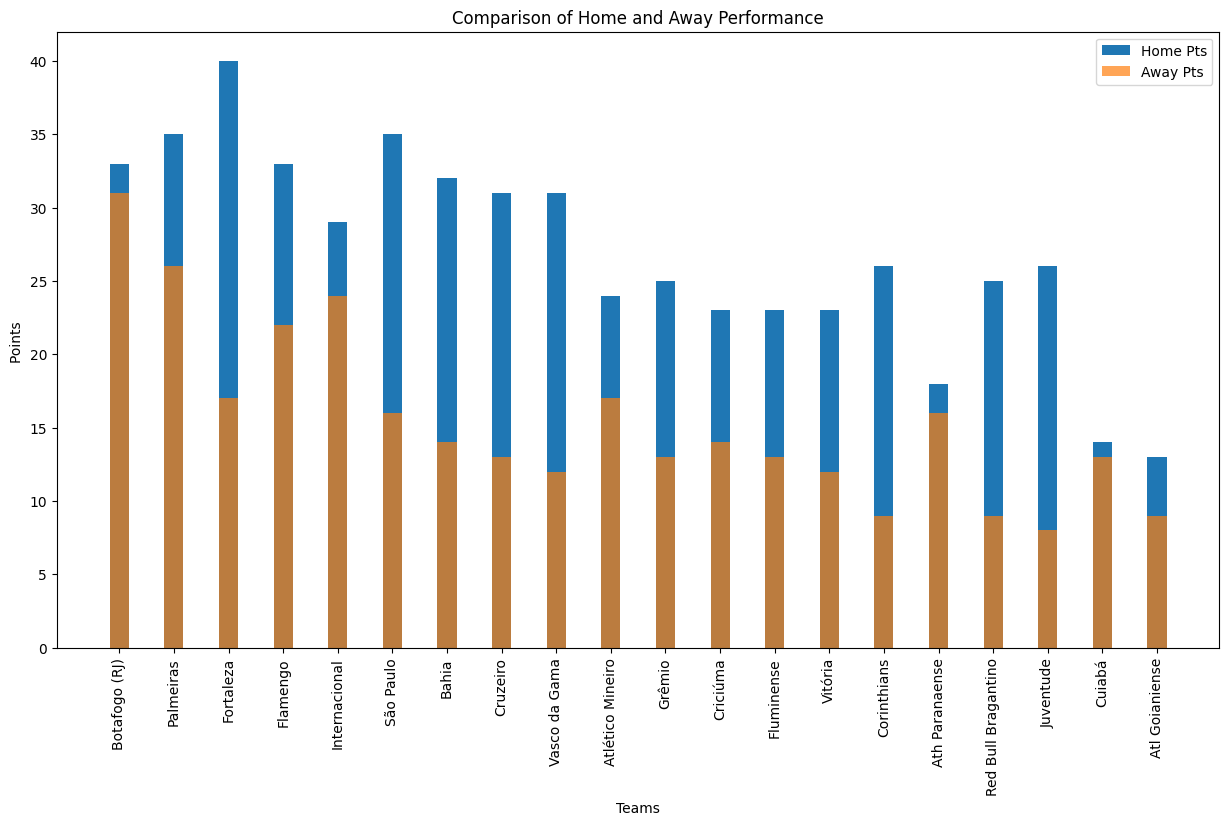

In [45]:
# Cálculo do desvio padrão dos pontos por jogo (Pts/MP) para avaliar a consistência
home_std = home_df['Home_Pts'].std()
away_std = away_df['Away_Pts'].std()

# Cálculo da variação no desempenho entre casa e fora (diferença Pts/MP)
home_away_variation = home_df['Home_Pts'] - away_df['Away_Pts']

# Consolidando os resultados em um DataFrame com a coluna Squad
consistency_variation_df = pd.DataFrame({
    "Team": home_df['Squad'],  # Adicionando a coluna 'Squad'
    "Home Pts": home_df['Home_Pts'],
    "Away Pts": away_df['Away_Pts'],
    "Difference (Home - Away)": home_away_variation,
    })

# Adicionando estatísticas de desvio padrão
std_summary = pd.DataFrame({
    "Category": ["Desvio Padrão (Home)", "Desvio Padrão (Away)"],
    "Value": [home_std, away_std]
})

# Exibindo o DataFrame de variação de consistência
display(consistency_variation_df)

# Plotar gráfico de barras comparando desempenho em casa e fora
plt.figure(figsize=(15, 8))
bar_width = 0.35
teams = consistency_variation_df["Team"]

# Barras para jogos em casa e fora
plt.bar(teams, consistency_variation_df["Home Pts"], width=bar_width, label="Home Pts")
plt.bar(teams, consistency_variation_df["Away Pts"], width=bar_width, label="Away Pts", alpha=0.7)

# Configurar legendas, título e rótulos
plt.xlabel("Teams")
plt.ylabel("Points ")
plt.title("Comparison of Home and Away Performance")
plt.xticks(rotation=90)  # Rotacionar nomes dos times para melhor visualização
plt.legend()

# Exibir o gráfico
plt.show()

<ipython-input-46-0f2c9159204d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df["Home Efficiency (%)"] = (home_df["Home_Pts"] / (home_df["Home_MP"] * 3)) * 100
<ipython-input-46-0f2c9159204d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df["Away Efficiency (%)"] = (away_df["Away_Pts"] / (away_df["Away_MP"] * 3)) * 100


                  Squad  Home Efficiency (%)  Away Efficiency (%)
0         Botafogo (RJ)            73.333333            64.583333
1             Palmeiras            72.916667            57.777778
2             Fortaleza            83.333333            37.777778
3              Flamengo            68.750000            48.888889
4         Internacional            64.444444            50.000000
5             São Paulo            72.916667            35.555556
6                 Bahia            71.111111            29.166667
7              Cruzeiro            68.888889            27.083333
8         Vasco da Gama            64.583333            26.666667
9      Atlético Mineiro            50.000000            40.476190
10               Grêmio            52.083333            28.888889
11             Criciúma            47.916667            31.111111
12           Fluminense            51.111111            27.083333
13              Vitória            47.916667            26.666667
14        

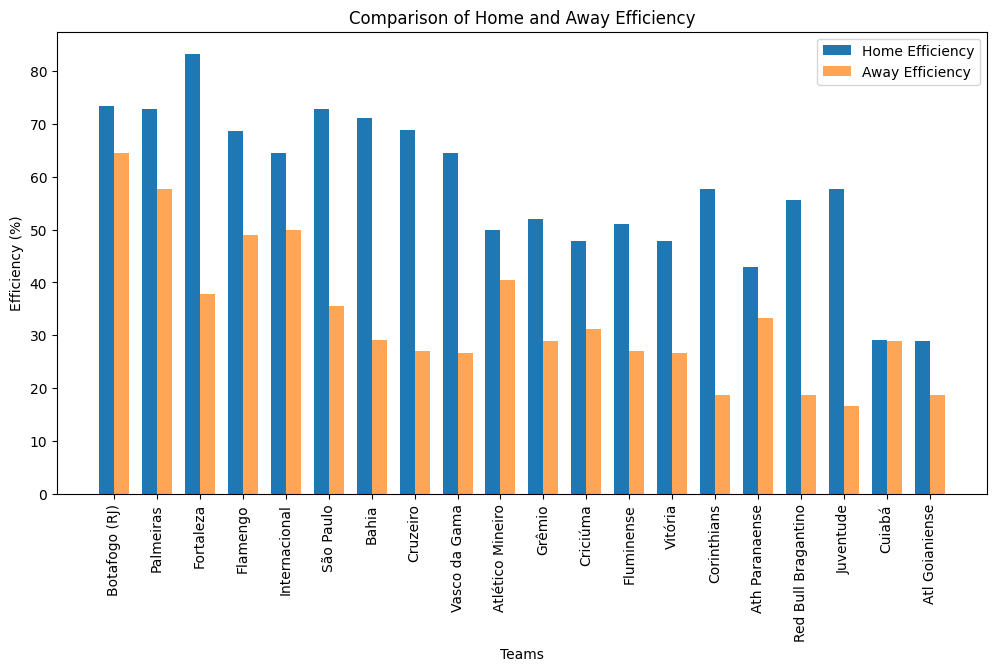

In [46]:
# Calcular o aproveitamento de pontos em casa e fora
home_df["Home Efficiency (%)"] = (home_df["Home_Pts"] / (home_df["Home_MP"] * 3)) * 100
away_df["Away Efficiency (%)"] = (away_df["Away_Pts"] / (away_df["Away_MP"] * 3)) * 100

# Combinar as informações em um único DataFrame usando a coluna 'Squad'
df = home_df[["Squad", "Home Efficiency (%)"]].merge(
    away_df[["Squad", "Away Efficiency (%)"]], on="Squad"
)

# Exibir o DataFrame consolidado
print(df)

# Plotar o gráfico de barras comparando o aproveitamento em casa e fora
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df["Squad"]))

# Barras para o aproveitamento
plt.bar([i - bar_width / 2 for i in x], df["Home Efficiency (%)"], width=bar_width, label="Home Efficiency")
plt.bar([i + bar_width / 2 for i in x], df["Away Efficiency (%)"], width=bar_width, label="Away Efficiency", alpha=0.7)

# Configurações do gráfico
plt.xlabel("Teams")
plt.ylabel("Efficiency (%)")
plt.title("Comparison of Home and Away Efficiency")
plt.xticks(x, df["Squad"], rotation=90)
plt.legend()

# Exibir o gráfico
plt.show()

<ipython-input-47-9f549ec90c58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df["Home_xGD"] = home_df["Home_xG"] - home_df["Home_xGA"]
<ipython-input-47-9f549ec90c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df["Away_xGD"] = away_df["Away_xG"] - away_df["Away_xGA"]


                  Squad  Home_xG  Home_xGA  Home_xGD  Away_xG  Away_xGA  \
0         Botafogo (RJ)     23.7      14.0       9.7     21.0      17.0   
1             Palmeiras     31.9      12.9      19.0     25.0      16.9   
2             Fortaleza     22.3      12.1      10.2     13.3      27.4   
3              Flamengo     22.5      14.5       8.0     22.4      21.0   
4         Internacional     28.2      12.6      15.6     20.5      15.2   
5             São Paulo     20.1      14.3       5.8     15.2      12.0   
6                 Bahia     20.3      13.0       7.3     20.9      21.3   
7              Cruzeiro     20.0      14.4       5.6     11.4      21.1   
8         Vasco da Gama     16.8      18.5      -1.7     13.9      23.4   
9      Atlético Mineiro     20.8      18.6       2.2     17.1      16.7   
10               Grêmio     21.5      18.2       3.3     15.1      19.1   
11             Criciúma     18.3      19.0      -0.7     14.4      23.6   
12           Fluminense  

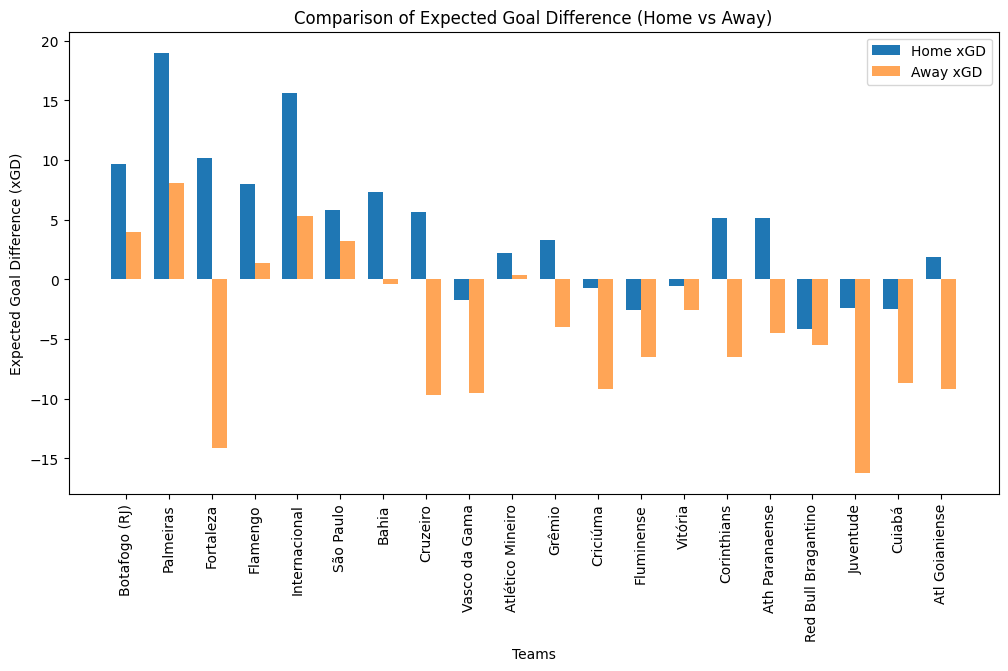

In [47]:
# Calcular o saldo esperado de gols (xGD) para casa e fora
home_df["Home_xGD"] = home_df["Home_xG"] - home_df["Home_xGA"]
away_df["Away_xGD"] = away_df["Away_xG"] - away_df["Away_xGA"]

# Combinar as informações em um único DataFrame usando a coluna 'Squad'
df = home_df[["Squad", "Home_xG", "Home_xGA", "Home_xGD"]].merge(
    away_df[["Squad", "Away_xG", "Away_xGA", "Away_xGD"]], on="Squad"
)

# Exibir o DataFrame consolidado
print(df)

# Plotar o gráfico comparando o saldo esperado de gols em casa e fora
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df["Squad"]))

# Barras para o saldo esperado de gols (xGD)
plt.bar([i - bar_width / 2 for i in x], df["Home_xGD"], width=bar_width, label="Home xGD")
plt.bar([i + bar_width / 2 for i in x], df["Away_xGD"], width=bar_width, label="Away xGD", alpha=0.7)

# Configurações do gráfico
plt.xlabel("Teams")
plt.ylabel("Expected Goal Difference (xGD)")
plt.title("Comparison of Expected Goal Difference (Home vs Away)")
plt.xticks(x, df["Squad"], rotation=90)
plt.legend()

# Exibir o gráfico
plt.show()

- Diferença positiva (xGD > 0): O time cria mais chances do que sofre, indicando um desempenho esperado positivo.
- Diferença negativa (xGD < 0): O time sofre mais chances de gols do que cria, sugerindo um desempenho esperado negativo.

In [48]:
correlacao_home = home_df[['Home_Pts', 'Home_xG', 'Home_xGA', 'Home_xGD']].corr()
correlacao_away = away_df[['Away_Pts', 'Away_xG', 'Away_xGA', 'Away_xGD']].corr()

print(correlacao_home)
print(correlacao_away)

          Home_Pts   Home_xG  Home_xGA  Home_xGD
Home_Pts  1.000000  0.485981 -0.604449  0.588896
Home_xG   0.485981  1.000000 -0.614014  0.940371
Home_xGA -0.604449 -0.614014  1.000000 -0.845880
Home_xGD  0.588896  0.940371 -0.845880  1.000000
          Away_Pts   Away_xG  Away_xGA  Away_xGD
Away_Pts  1.000000  0.724782 -0.495195  0.737201
Away_xG   0.724782  1.000000 -0.318332  0.772881
Away_xGA -0.495195 -0.318332  1.000000 -0.847574
Away_xGD  0.737201  0.772881 -0.847574  1.000000


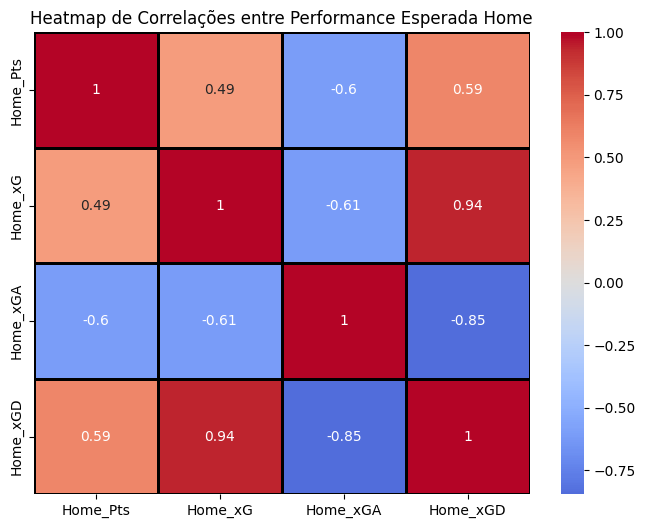

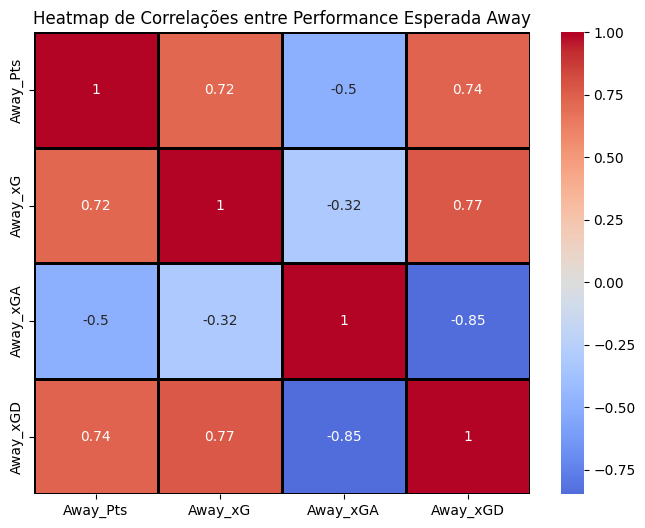

In [49]:
# Plotando o Heatmap de Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_home, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')

plt.title('Heatmap de Correlações entre Performance Esperada Home')
plt.show()

# Plotando o Heatmap de Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_away, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')

plt.title('Heatmap de Correlações entre Performance Esperada Away')
plt.show()

In [50]:
# Calculando a matriz de correlação
correlacao = df_final[['Pts','W', 'GF', 'GA', 'GD', 'Poss_','Expected_npxG', 'Expected_xAG', 'Salário Anual ($)', 'Valor de Mercado (€)', 'Total_Cards_','Performance_Fls']].corr()
print(correlacao)

                           Pts         W        GF        GA        GD  \
Pts                   1.000000  0.985778  0.888578 -0.794227  0.961949   
W                     0.985778  1.000000  0.857789 -0.796008  0.944441   
GF                    0.888578  0.857789  1.000000 -0.537894  0.890359   
GA                   -0.794227 -0.796008 -0.537894  1.000000 -0.862708   
GD                    0.961949  0.944441  0.890359 -0.862708  1.000000   
Poss_                 0.436983  0.436061  0.456621 -0.408571  0.494560   
Expected_npxG         0.667856  0.656521  0.742643 -0.582816  0.760236   
Expected_xAG          0.665020  0.659642  0.709895 -0.586493  0.742577   
Salário Anual ($)     0.618348  0.609697  0.632263 -0.500491  0.649564   
Valor de Mercado (€)  0.679423  0.689863  0.723593 -0.578807  0.746644   
Total_Cards_         -0.430689 -0.489466 -0.459530  0.370938 -0.475982   
Performance_Fls       0.470573  0.383145  0.344408 -0.512923  0.483600   

                         Poss_  Expec

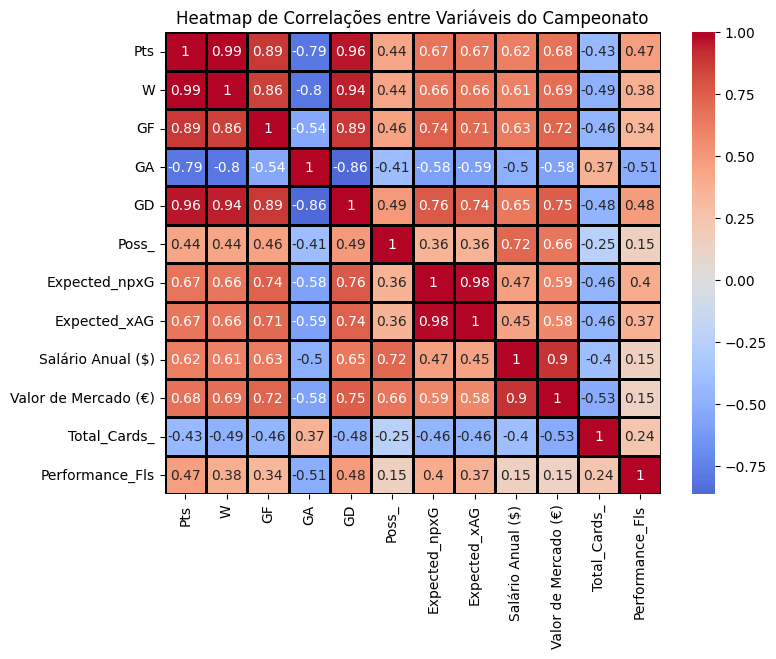

In [51]:
# Plotando o Heatmap de Correlações
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')

plt.title('Heatmap de Correlações entre Variáveis do Campeonato')
plt.show()


### Análise de Correlação entre Variáveis do Campeonato

Abaixo, uma análise detalhada das correlações entre as principais variáveis do campeonato, com base no heatmap:

1. **Pts (Pontos) e GD (Saldo de Gols)**:
   - Existe uma correlação muito forte entre pontos e saldo de gols (**0.96**). Isso é esperado, pois times com saldo de gols positivo tendem a ganhar mais jogos e, consequentemente, acumular mais pontos.

2. **GF (Gols a Favor) e Pts**:
   - Há uma correlação forte e positiva (**0.89**) entre gols a favor e pontos. Isso indica que equipes que marcam mais gols geralmente acumulam mais pontos.

3. **GA (Gols Contra) e GD**:
   - Existe uma correlação negativa forte entre gols contra e saldo de gols (**-0.86**), o que sugere que times que sofrem mais gols têm um saldo de gols menor, afetando seu desempenho.

4. **Salário Anual (€) e Valor de Mercado (€)**:
   - A correlação forte entre salário anual e valor de mercado (**0.91**) sugere que equipes com maior valor de mercado também tendem a pagar salários mais altos, indicando uma possível relação entre o poder financeiro e o desempenho.

5. **Expected_npxG e Expected_xAG**:
   - A correlação muito alta (**0.98**) entre esses valores esperados indica que eles são métricas complementares, ambas associadas ao desempenho ofensivo das equipes.

6. **Total_Cards e GD**:
   - Existe uma correlação negativa entre o número total de cartões e o saldo de gols (**-0.43**), indicando que equipes que recebem mais cartões tendem a ter um saldo de gols menor, o que pode estar relacionado a uma postura mais defensiva ou a possíveis faltas que prejudicam o desempenho.

7. **Posse de Bola (Poss_)**:
   - A posse de bola tem uma correlação positiva com variáveis como xAG (**0.36**) e salário anual (**0.65**), sugerindo que times que tendem a investir mais em jogadores de alto valor possuem uma estratégia mais ofensiva, possuem jogadores de qualidade mais tecnica que tem a posse de bola e criam mais jogadass.

In [53]:
# Verifique se 'Pts', 'Valor de Mercado (€)' e 'Salário Anual ($)' estão disponíveis nos DataFrames
if 'Pts' in df_final.columns and 'Valor de Mercado (€)' in df_final.columns and 'Salário Anual ($)' in df_final.columns:

    # Evitando divisão por zero ao calcular a eficiência
    df_final['Valor de Mercado (Mi €)'] = df_final['Valor de Mercado (€)'].replace(0, float('nan'))
    df_final['Salário Anual ($)'] = df_final['Salário Anual ($)'].replace(0, float('nan'))
    #Padronizando as casas decimais
    df_final['Salário Anual (Mi $)'] = df_final['Salário Anual ($)']/1000000
    # Calculando Eficiência Financeira - Pontos por Valor de Mercado e Salário
    df_final['Eficiencia_Mercado'] = df_final['Pts'] / df_final['Valor de Mercado (Mi €)']
    df_final['Eficiencia_Salario'] = df_final['Pts'] / df_final['Salário Anual (Mi $)']

    # Métrica combinada: Média entre Eficiência por Mercado e Salário
    df_final['Eficiencia_Combinada'] = (df_final['Eficiencia_Mercado'] + df_final['Eficiencia_Salario']) / 2

    # Exibindo o DataFrame final com as novas colunas de eficiência
    print(df_final[['Clubes', 'Pts', 'Valor de Mercado (Mi €)', 'Salário Anual (Mi $)',
                    'Eficiencia_Mercado', 'Eficiencia_Salario', 'Eficiencia_Combinada']])
else:
    print("\nErro: Colunas necessárias para calcular a eficiência financeira não foram encontradas.")


                  Clubes  Pts  Valor de Mercado (Mi €)  Salário Anual (Mi $)  \
0   Athletico Paranaense   34                    56.40                11.000   
1    Atlético Goianiense   22                    23.70                 8.500   
2       Atlético Mineiro   41                   105.10                34.375   
3               EC Bahia   46                    77.25                19.140   
4            Botafogo FR   64                   136.10                30.970   
5         SC Corinthians   35                   105.20                33.130   
6            Criciúma EC   37                    21.63                 7.520   
7            Cruzeiro EC   44                    80.85                18.600   
8              Cuiabá EC   27                    26.70                 7.170   
9            CR Flamengo   55                   212.10                54.220   
10         Fluminense FC   36                    82.05                28.290   
11          Fortaleza EC   57           

<ipython-input-54-0a5da80485aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


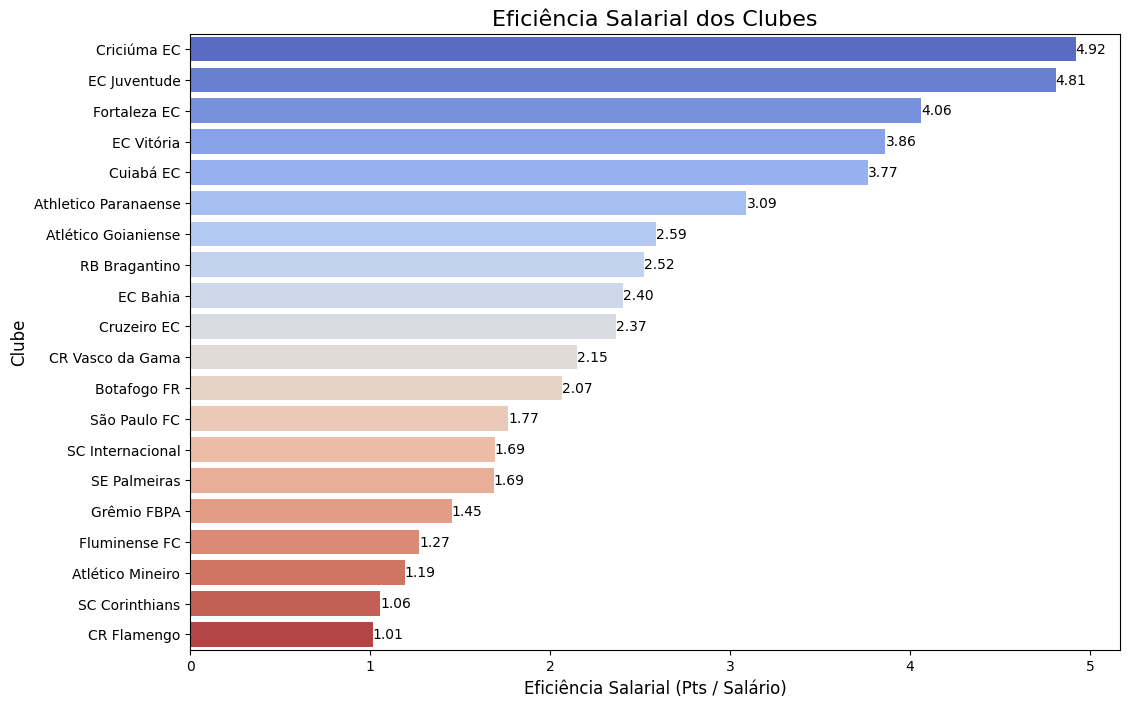

<ipython-input-54-0a5da80485aa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


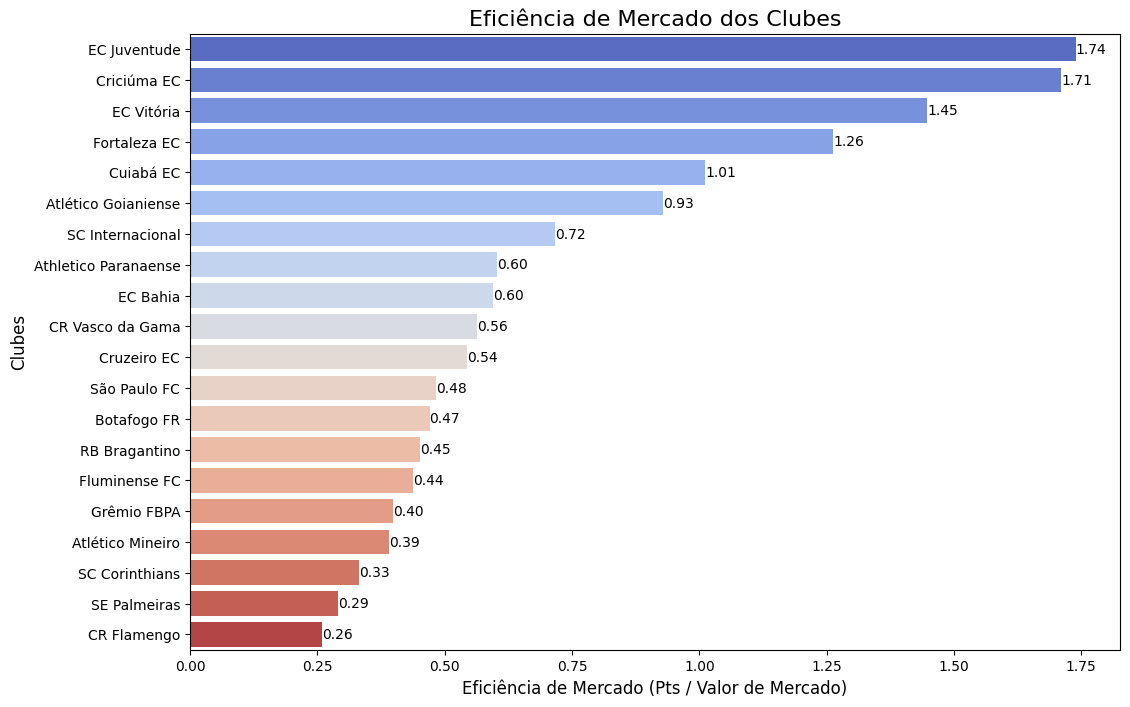

In [54]:
# Ordenando os dados para ambos os gráficos
df_final = df_final.sort_values(by='Eficiencia_Salario', ascending=False)

# Gráfico 1: Eficiência Salarial
plt.figure(figsize=(12, 8))
sns.barplot(
    y='Clubes',
    x='Eficiencia_Salario',
    data=df_final,
    palette='coolwarm',  # Paleta de cores
    orient='h'
)
for index, value in enumerate(df_final['Eficiencia_Salario']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.title('Eficiência Salarial dos Clubes', fontsize=16)
plt.xlabel('Eficiência Salarial (Pts / Salário)', fontsize=12)
plt.ylabel('Clube', fontsize=12)
plt.show()

# Ordenando os dados para o segundo gráfico
df_final = df_final.sort_values(by='Eficiencia_Mercado', ascending=False)

# Gráfico 2: Eficiência de Mercado
plt.figure(figsize=(12, 8))
sns.barplot(
    y='Clubes',
    x='Eficiencia_Mercado',
    data=df_final,
    palette='coolwarm',  # Paleta de cores
    orient='h'
)
for index, value in enumerate(df_final['Eficiencia_Mercado']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.title('Eficiência de Mercado dos Clubes', fontsize=16)
plt.xlabel('Eficiência de Mercado (Pts / Valor de Mercado)', fontsize=12)
plt.ylabel('Clubes', fontsize=12)
plt.show()

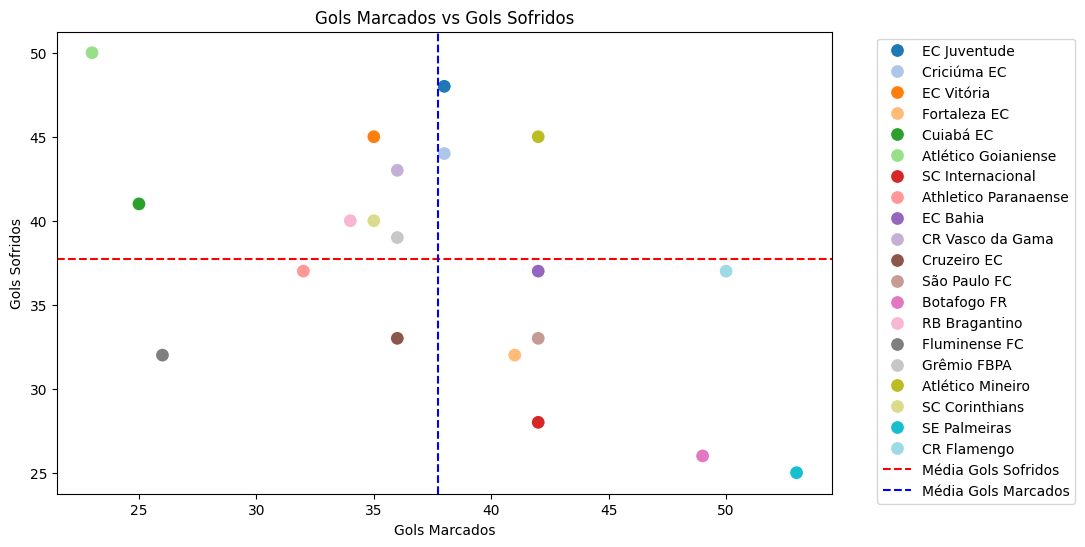

In [55]:
# Gráfico de Dispersão: Gols Marcados vs Gols Sofridos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='GF', y='GA', hue='Clubes', palette='tab20', s=100)
plt.title('Gols Marcados vs Gols Sofridos')
plt.xlabel('Gols Marcados')
plt.ylabel('Gols Sofridos')

# Adicionando linha de referência
plt.axhline(df_final['GF'].mean(), linestyle='--', color='red', label='Média Gols Sofridos')
plt.axvline(df_final['GA'].mean(), linestyle='--', color='blue', label='Média Gols Marcados')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Inferior direito: Times com boa performance ofensiva e defensiva (muitos gols marcados e poucos sofridos). Exemplo: Palmeiras.

- Superior direito: Times que marcam muitos gols, mas também sofrem bastante (ofensivos, mas vulneráveis na defesa).

- Inferior esquerdo: Times que marcam e sofrem poucos gols, provavelmente com um estilo de jogo mais defensivo.

- Superior esquerdo: Times que sofrem muitos gols e marcam pouco, indicando uma fase mais complicada ou fragilidade nas duas frentes.

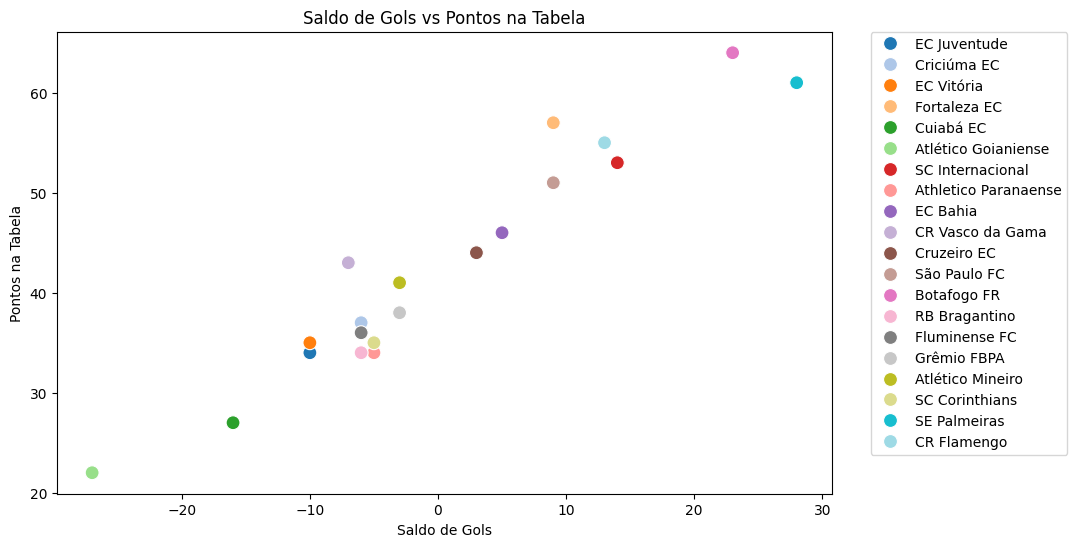

In [56]:
# Scatter plot: Saldo de Gols vs Pontos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='GD', y='Pts', hue='Clubes', palette='tab20', s=100)

plt.title('Saldo de Gols vs Pontos na Tabela')
plt.xlabel('Saldo de Gols')
plt.ylabel('Pontos na Tabela')

# Ajuste da posição da legenda para evitar sobreposição
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

- Times com bom desempenho (alto saldo de gols e boa posição na tabela):

  - Botafogo (RJ) está no canto inferior direito, sugerindo um excelente saldo de gols e uma posição alta na tabela.
  - Palmeiras também aparece com saldo positivo e em boa colocação.
-Times medianos:

  - A maioria dos clubes está concentrada ao redor do saldo de gols próximo de zero e em posições intermediárias na tabela, indicando uma campanha equilibrada.
-Times com saldo negativo e posições ruins:

  - Atlético Goianiense e Cuiaba apresentam saldos negativos e estão mal posicionados.
  Essa correlação sugere que os clubes com pior desempenho defensivo e ofensivo tendem a ficar nas últimas posições.

In [57]:
# Separando times com saldo positivo e negativo
saldo_positivo = df_final[df_final['GD'] > 0]
saldo_negativo = df_final[df_final['GD'] <= 0]

# Exibindo algumas estatísticas
print("Times com Saldo Positivo:")
print(saldo_positivo[['Clubes', 'Pts', 'GD']].sort_values(by='Pts', ascending=False))

print("\nTimes com Saldo Negativo:")
print(saldo_negativo[['Clubes', 'Pts', 'GD']].sort_values(by='Pts', ascending=False))


Times com Saldo Positivo:
              Clubes  Pts  GD
4        Botafogo FR   64  23
15      SE Palmeiras   61  28
11      Fortaleza EC   57   9
9        CR Flamengo   55  13
13  SC Internacional   53  14
17      São Paulo FC   51   9
3           EC Bahia   46   5
7        Cruzeiro EC   44   3

Times com Saldo Negativo:
                  Clubes  Pts  GD
18      CR Vasco da Gama   43  -7
2       Atlético Mineiro   41  -3
12           Grêmio FBPA   38  -3
6            Criciúma EC   37  -6
10         Fluminense FC   36  -6
19            EC Vitória   35 -10
5         SC Corinthians   35  -5
14          EC Juventude   34 -10
0   Athletico Paranaense   34  -5
16         RB Bragantino   34  -6
8              Cuiabá EC   27 -16
1    Atlético Goianiense   22 -27


- Ter saldo positivo está diretamente relacionado a uma boa colocação. A maioria desses clubes briga por posições de destaque, como vaga para Libertadores ou títulos.

- Um saldo negativo expressivo, como o do Atlético Goianiense (-25) ou Cuiabá (-15), é um sinal claro de uma campanha difícil, com muitos gols sofridos e poucas vitórias  correm maior risco de rebaixamento.

- Embora o saldo de gols negativo seja um indicativo de campanhas desequilibradas, **Atlético Mineiro e Vasco da Gama** estão entre os 10 times mais pontuadores da competição.

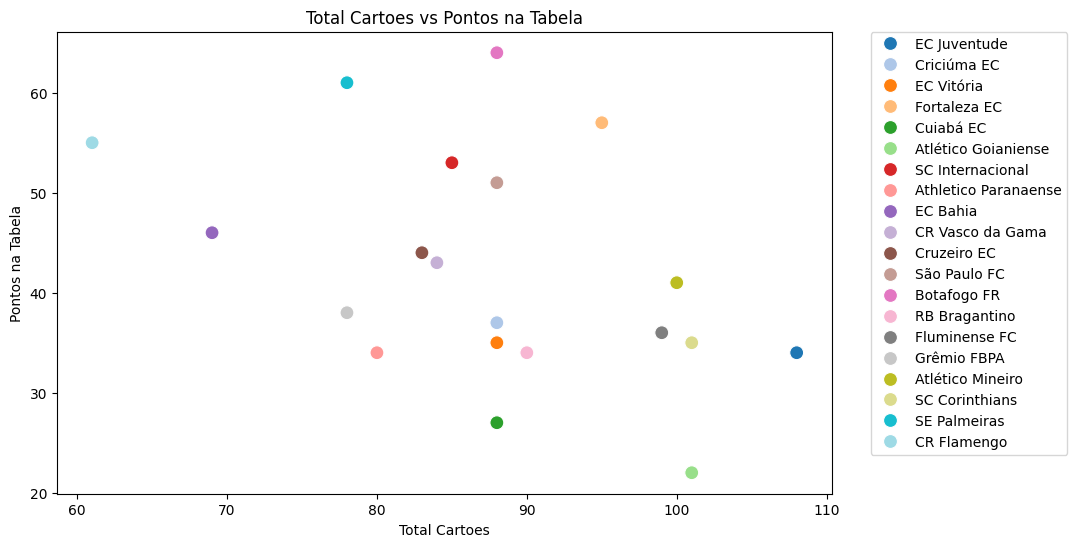

In [58]:
# Scatter plot: Saldo de Gols vs Pontos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='Total_Cards_', y='Pts', hue='Clubes', palette='tab20', s=100)

plt.title('Total Cartoes vs Pontos na Tabela')
plt.xlabel('Total Cartoes')
plt.ylabel('Pontos na Tabela')

# Ajuste da posição da legenda para evitar sobreposição
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# 4. Modelagem e Clusterização:

In [59]:
# Selecionando variáveis relevantes
X = df_final[['Pts','W','L','GF', 'GA', 'GD','Poss_', 'Expected_npxG','Expected_xAG','Eficiencia_Combinada','Total_Cards_',]]

# Padronizando os dados para garantir escala uniforme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


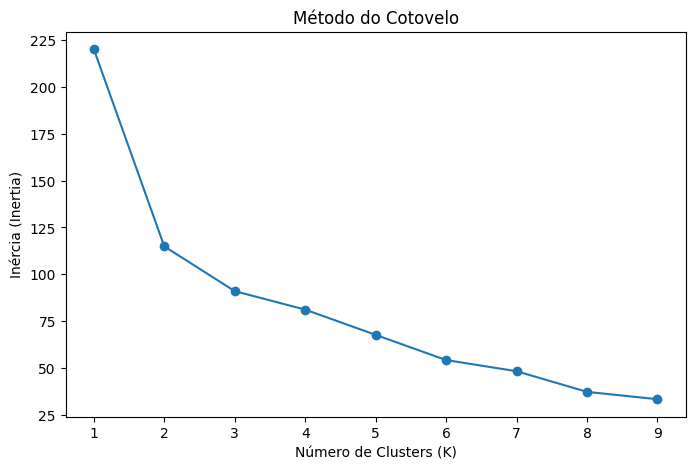

In [60]:
# Testando diferentes valores de K (número de clusters)
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Inertia)')
plt.title('Método do Cotovelo')
plt.show()


- O "cotovelo" é visível por volta de K=3 ou K=4. Esses são os candidatos mais prováveis para o número ideal de clusters.
  - K=3: Pode ser uma escolha eficiente, capturando a maior parte da estrutura dos dados.
  - K=4: mais granularidade na segmentação, essa também é uma opção razoável.

In [62]:
# Aplicando K-means com K=4
kmeans = KMeans(n_clusters=4, random_state=42)
df_final['cluster'] = kmeans.fit_predict(X_scaled)

# Exibindo os times e seus clusters
df_clustered = df_final[['Clubes','Pts','W','L','GF', 'GA', 'GD','Poss_', 'Expected_npxG','Expected_xAG','Eficiencia_Combinada','Total_Cards_', 'cluster']]
print(df_clustered.sort_values(by='cluster'))


                  Clubes  Pts   W   L  GF  GA  GD  Poss_  Expected_npxG  \
12           Grêmio FBPA   38  11  15  36  39  -3   46.7           35.1   
0   Athletico Paranaense   34   9  14  32  37  -5   49.4           37.2   
3               EC Bahia   46  13  11  42  37   5   55.7           40.4   
9            CR Flamengo   55  16   8  50  37  13   55.2           37.8   
4            Botafogo FR   64  19   5  49  26  23   52.9           40.2   
11          Fortaleza EC   57  16   6  41  32   9   42.6           32.3   
17          São Paulo FC   51  15  10  42  33   9   56.9           32.0   
15          SE Palmeiras   61  18   6  53  25  28   53.8           50.3   
13      SC Internacional   53  14   6  42  28  14   51.7           43.0   
14          EC Juventude   34   8  13  38  48 -10   47.5           33.0   
8              Cuiabá EC   27   6  16  25  41 -16   43.9           22.9   
19            EC Vitória   35  10  16  35  45 -10   43.3           27.8   
6            Criciúma EC 

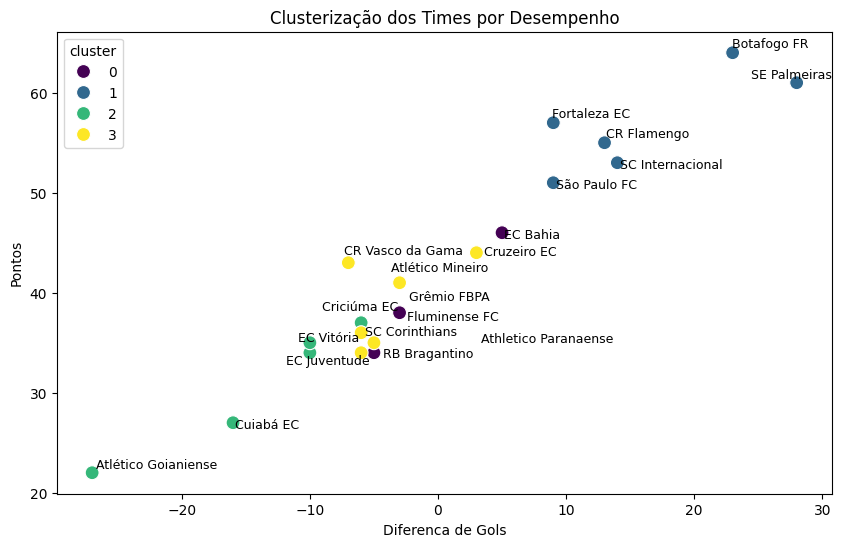

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='GD', y='Pts', hue='cluster', palette='viridis', s=100)

# Adicionando nomes dos times com ajuste para evitar sobreposição
texts = [plt.text(row['GD'], row['Pts'], row['Clubes'], fontsize=9) for i, row in df_final.iterrows()]
adjust_text(texts)

plt.title('Clusterização dos Times por Desempenho')
plt.xlabel('Diferenca de Gols')
plt.ylabel('Pontos')
plt.show()


## Análise dos Clusters

### Cluster 0 (Roxo)
Times como **Bahia** e **Cruzeiro** estão neste cluster, com desempenho de pontos relativamente alto, mas sem uma diferença de gols extremamente positiva. Esses times conseguem converter sua performance em pontos, mas têm uma eficiência defensiva e ofensiva moderada, mantendo-se no meio da tabela.

### Cluster 1 (Amarelo)
Com clubes como **Vasco da Gama**, **Atlético Mineiro**, e **Grêmio**, este cluster agrupa times com desempenho mediano tanto em saldo de gols quanto em pontos. Eles têm uma eficiência mais equilibrada e podem estar lutando para manter uma consistência que os eleve na classificação.

### Cluster 2 (Verde)
**Atlético Goianiense** e **Cuiabá** estão neste cluster, ambos com saldo de gols negativo e pontos mais baixos. Isso indica um desempenho abaixo da média, tanto defensivamente quanto ofensivamente, o que resulta em dificuldades para somar pontos na tabela.

### Cluster 3 (Azul)
Inclui times de alta performance como **Botafogo (RJ)**, **Palmeiras**, e **Flamengo**, que têm saldo de gols altamente positivo e uma pontuação elevada. Esses clubes estão no topo da classificação, mostrando um equilíbrio entre ataque e defesa que permite manter uma diferença de gols favorável e transformar isso em pontos.

## Observações Gerais

- **Botafogo (RJ)** e **Palmeiras** se destacam pela combinação de alta pontuação e grande diferença de gols, indicando uma temporada dominante.
- **Fortaleza** e **Flamengo** também estão em uma posição forte, mostrando solidez ao converter o saldo de gols positivo em pontos.
- **Atlético Goianiense** apresenta o pior desempenho, tanto em saldo de gols quanto em pontos, mostrando que provavelmente está enfrentando dificuldades significativas na temporada.

In [65]:
correlacao = df_final[['Pts', 'Valor de Mercado (€)']].corr()
print("Correlação entre Pontos e Valor de Mercado:")
print(correlacao)


Correlação entre Pontos e Valor de Mercado:
                           Pts  Valor de Mercado (€)
Pts                   1.000000              0.679423
Valor de Mercado (€)  0.679423              1.000000


Correlação positiva (0.637):
Isso sugere que, em geral, clubes com maior valor de mercado tendem a conquistar mais pontos, mas essa relação não é perfeita.

Correlação moderada:
Embora exista uma tendência positiva, outros fatores além do valor de mercado influenciam os pontos conquistados (como a gestão, técnico, planejamento e desempenho dos jogadores em campo).

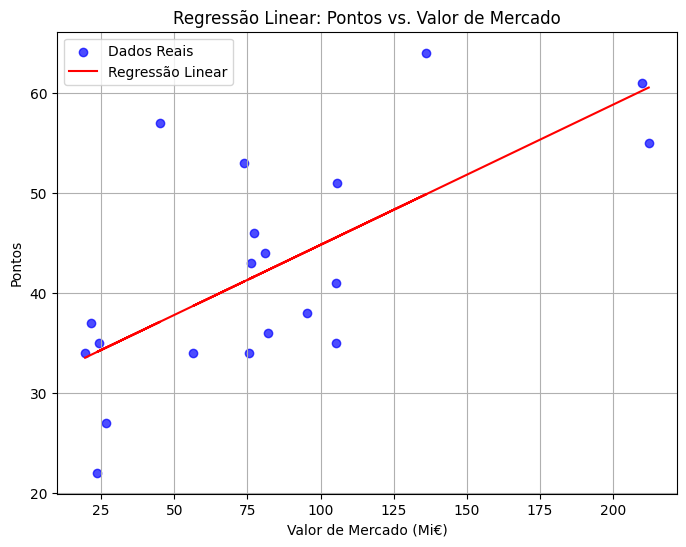

Coeficiente da Regressão: 0.14
Intercepto: 30.76


In [67]:
# Preparar os dados
X = df_final[['Valor de Mercado (€)']].values
y = df_final['Pts'].values

# Ajustar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões
y_pred = modelo.predict(X)

# Plotar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Dados Reais')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.title('Regressão Linear: Pontos vs. Valor de Mercado')
plt.xlabel('Valor de Mercado (Mi€)')
plt.ylabel('Pontos')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente da Regressão: {modelo.coef_[0]:.2f}")
print(f"Intercepto: {modelo.intercept_:.2f}")


In [68]:
r2 = modelo.score(X, y)
print(f"R²: {r2:.2f}")

R²: 0.46


O valor de R² = 0.43 indica que o modelo de regressão linear explica 43% da variação nos pontos dos clubes com base no valor de mercado. Isso sugere que o valor de mercado tem alguma influência no desempenho dos clubes, mas 57% da variação nos pontos é explicada por outros fatores.

In [ ]:
 #Adicionar Variáveis Explicativas que possam melhorar o modelo

# Selecionar as colunas relevantes do league_table
df_teams = league_table[['team', 'GF', 'GA', 'Pts']].copy()

# Renomear as colunas para facilitar a leitura
df_teams = df_teams.rename(columns={
    'GF': 'gols_marcados',
    'GA': 'gols_sofridos',
    'Pts': 'pontos'
})

# Adicionar nova variável explicativa: saldo de gols
df_teams['saldo_gols'] = df_teams['gols_marcados'] - df_teams['gols_sofridos']

# Exibir uma amostra dos dados com as variáveis explicativas
print("\nAmostra dos Dados:")
print(df_teams.head())


In [ ]:
#Adicionar Variáveis Explicativas que possam melhorar o modelo
# Selecionar as colunas relevantes do league_table
df_teams = league_table[['team', 'GF', 'GA', 'Pts']].copy()

# Renomear as colunas para facilitar a leitura
df_teams = df_teams.rename(columns={'GF': 'gols_marcados', 'GA': 'gols_sofridos', 'Pts': 'pontos'})

# Exibir uma amostra dos dados
print(df_teams.head())


In [ ]:
# Clubes não combinados do Sofascore
clubes_nao_mapeados_sofascore = df_teams[~df_teams['team'].isin(df['team'])]
print("\nClubes do Sofascore não combinados:")
print(clubes_nao_mapeados_sofascore['team'].unique())

# Clubes não combinados do Transfermarkt
clubes_nao_mapeados_transfermarkt = df_clubes[~df_clubes['Clube'].isin(df['Clube'])]
print("\nClubes do Transfermarkt não combinados:")
print(clubes_nao_mapeados_transfermarkt['Clube'].unique())


In [ ]:
# Função para encontrar correspondências aproximadas
def padronizar_nome(nome, lista_nomes):
    nome_padronizado, score = process.extractOne(nome, lista_nomes)
    if score >= 80:  # Considerar correspondências com score >= 80
        return nome_padronizado
    return None

# Aplicar fuzzy matching aos nomes dos clubes do Sofascore
df_teams['team_padronizado'] = df_teams['team'].apply(
    lambda x: padronizar_nome(x, df_clubes['Clube'].unique())
).fillna(df_teams['team'])

# Realizar a união dos DataFrames com nomes padronizados
df = pd.merge(
    df_teams,
    df_clubes,
    left_on='team_padronizado',
    right_on='Clube',
    how='inner'
)

# Verificar o DataFrame após a união
print("\nTimes combinados corretamente:")
print(df[['team_padronizado', 'pontos', 'Valor de Mercado (€)']])

# Definir as variáveis independentes e a variável dependente
X2 = df[['Valor de Mercado (€)', 'gols_marcados', 'gols_sofridos']]
y2 = df['pontos']

# Treinar o modelo de regressão linear
modelo2 = LinearRegression()
modelo2.fit(X2, y2)

# Fazer previsões
df['pontos_previstos'] = modelo2.predict(X2)

# Avaliar o modelo
r2 = modelo2.score(X2, y2)
print(f"\nR²: {r2:.2f}")
# Exibir os coeficientes da regressão
print(f"Coeficientes: {modelo2.coef_}")
print(f"Intercepto: {modelo2.intercept_}")
# Exibir os times com pontos reais e previstos
print("\nTimes Avaliados e Pontos Previstos:")
print(df[['team_padronizado', 'pontos', 'pontos_previstos']])

## Coeficientes:
### Valor de Mercado (€):
Coeficiente: -0.0257
O coeficiente negativo sugere que, em média, o aumento no valor de mercado tem um impacto pequeno e negativo nos pontos. Pode indicar que valor de mercado sozinho não garante sucesso em campo.

### Gols Marcados:
Coeficiente: 1.0492
Cada gol marcado adiciona aproximadamente 1 ponto. Isso confirma a importância de um ataque eficiente para o desempenho.

### Gols Sofridos:
Coeficiente: -0.7772
Cada gol sofrido reduz os pontos em cerca de 0.78. Esse coeficiente reforça a importância de uma defesa sólida.

### Intercepto: 32.91

Este valor representa o número de pontos previstos para um time com todas as variáveis independentes iguais a zero (ou seja, no ponto de origem do modelo). Embora não tenha um significado prático direto, ele é necessário para ajustar a linha de regressão.

In [ ]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pontos'], df['pontos_previstos'], color='blue')

# Adicionar uma linha de referência para comparação 1:1
plt.plot(
    [df['pontos'].min(), df['pontos'].max()],
    [df['pontos'].min(), df['pontos'].max()],
    'r--'
)

# Adicionar os nomes dos times usando adjust_text para evitar sobreposição
texts = []
for i in range(df.shape[0]):
    texts.append(
        plt.text(
            df['pontos'].iloc[i],
            df['pontos_previstos'].iloc[i],
            df['team'].iloc[i],
            fontsize=9
        )
    )

# Ajustar os textos para evitar sobreposição
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

# Configurar rótulos e título
plt.xlabel('Pontos Reais')
plt.ylabel('Pontos Previstos')
plt.title('Pontos Reais vs. Pontos Previstos')

# Exibir o gráfico
plt.show()

In [ ]:
# Calcular custo por gol e custo por ponto
df['Custo por Gol (€)'] = df['Valor de Mercado (€)'] / df['gols_marcados']
df['Custo por Ponto (€)'] = df['Valor de Mercado (€)'] / df['pontos']

In [ ]:
# Gráficos para comparar os custos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de custo por gol
df.plot(kind='bar', x='team_padronizado', y='Custo por Gol (€)', ax=axes[0], legend=False)
axes[0].set_title('Custo por Gol (€ milhões)')
axes[0].set_ylabel('Custo por Gol')

# Gráfico de custo por ponto
df.plot(kind='bar', x='team_padronizado', y='Custo por Ponto (€)', ax=axes[1], legend=False)
axes[1].set_title('Custo por Ponto (€ milhões)')
axes[1].set_ylabel('Custo por Ponto')

plt.tight_layout()
plt.show()

# Exibir os dados calculados
df[['team_padronizado', 'Custo por Gol (€)', 'Custo por Ponto (€)']]



*  Custo por Gol mais baixo:
#####   EC Juventude (€0.54M) e Criciúma EC (€0.58M) são extremamente eficientes em marcar gols com menor custo.
    
*  Custo por Ponto mais baixo:
##### Fortaleza EC (€0.81M) tem o menor custo por ponto, destacando uma relação excelente entre investimento e pontuação.

*  Custo por Gol mais alto:
##### CR Flamengo (€4.71M) e SE Palmeiras (€4.11M) gastam mais para cada gol marcado, indicando uma ineficiência relativa.

*  Custo por Ponto mais alto:
##### CR Flamengo (€4.15M) e SE Palmeiras (€3.49M) também apresentam os maiores custos por ponto, sugerindo que o alto valor de mercado não está sendo traduzido em desempenho ideal no campo.



In [ ]:
# Criar um gráfico de dispersão cruzando Custo por Gol e Custo por Ponto
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Custo por Gol (€)'], df['Custo por Ponto (€)'], s=100)

# Adicionar rótulos aos pontos
for i, team in enumerate(df['team_padronizado']):
    plt.text(df['Custo por Gol (€)'][i], df['Custo por Ponto (€)'][i], team, fontsize=9, ha='right')

# Adicionar título e rótulos
plt.title('Cruzamento entre Custo por Gol e Custo por Ponto')
plt.xlabel('Custo por Gol (€ milhões)')
plt.ylabel('Custo por Ponto (€ milhões)')

# Exibir o gráfico
plt.grid(True)
plt.show()



1.   Eficiência Máxima:
#### **Fortaleza EC**, **EC Juventude** e **Criciúma EC** mantêm a posição de maior eficiência, com baixo custo por ponto e por gol.
2.   Ineficiência Relativa:
#### **CR Flamengo** e **SE Palmeiras** continuam no topo da ineficiência, apresentando os maiores custos tanto por gol quanto por ponto.
3.   Clubes Intermediários:
#### **Atlético Mineiro**, **Grêmio** e **Fluminense** têm custos mais equilibrados, mas ainda estão distantes dos mais eficientes.
#### **Corinthians** apresenta um custo por ponto elevado, sugerindo uma dificuldade em transformar investimento em desempenho esportivo.
4.   Clubes com Bom Equilíbrio:
#### **Athletico Paranaense**, **SC Internacional** e **EC Bahia** se destacam por um custo relativamente baixo, indicando um bom aproveitamento financeiro.





In [ ]:
team_season_std_stats = fbref.read_team_season_stats(stat_type="standard")
team_season_std_stats.head()

In [ ]:
# Selecionar colunas específicas do MultiIndex
xg_xag_df = team_season_std_stats[[('Performance','Gls'),
                                   ('Performance','Ast'),
                                   ('Expected','xG'),
                                   ('Expected','xAG')]]

# Renomear as colunas para facilitar o uso
xg_xag_df.columns = ['Gols','Assistencias','xG','xAG']
# Resetar o índice para mover liga e temporada para colunas separadas
xg_xag_df = xg_xag_df.reset_index(level=['league', 'season'], drop=True)
print(xg_xag_df)


In [ ]:
# Calcular as diferenças entre valores reais e esperados
xg_xag_df['Gls_xG_diff'] = xg_xag_df['Gols'] - xg_xag_df['xG']
xg_xag_df['Ast_xAG_diff'] = xg_xag_df['Assistencias'] - xg_xag_df['xAG']

# Exibir uma amostra do DataFrame para conferência
print(xg_xag_df[['Gols', 'xG', 'Gls_xG_diff', 'Assistencias', 'xAG', 'Ast_xAG_diff']].head())

# Criar gráficos para comparação
plt.figure(figsize=(14, 5))

# Subplot 1: Gols vs xG
plt.subplot(1, 2, 1)
for i, row in xg_xag_df.iterrows():
    plt.plot(['xG', 'Gols'], [row['xG'], row['Gols']], marker='o', label=f'{i}')

plt.title('Comparação de Gols vs Expected Goals (xG)')
plt.xlabel('Métrica')
plt.ylabel('Quantidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adicionar legenda externa

# Subplot 2: Assistências vs xAG
plt.subplot(1, 2, 2)
for i, row in xg_xag_df.iterrows():
    plt.plot(['xAG', 'Assistencias'], [row['xAG'], row['Assistencias']], marker='o', label=f'{i}')

plt.title('Comparação de Assistências vs Expected Assists (xAG)')
plt.xlabel('Métrica')
plt.ylabel('Quantidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adicionar legenda externa

plt.tight_layout()
plt.show()

#Interpretação dos Resultados
- Gols e Assistências Acima das Expectativas: Se a diferença for positiva, o time está superando as expectativas.

- Gols e Assistências Abaixo das Expectativas: Se a diferença for negativa, o desempenho está abaixo do esperado.

#Eficiência Ofensiva (Overperformance / Underperformance)

In [ ]:
# Calcular eficiência ofensiva: Gols / xG
xg_xag_df['Eficiencia_Ofensiva'] = xg_xag_df['Gols'] / xg_xag_df['xG']

# Exibir a eficiência ofensiva
print(xg_xag_df[['Gols', 'xG', 'Eficiencia_Ofensiva']])


In [ ]:
# Calcular eficiência de assistências: Assistências / xAG
xg_xag_df['Eficiencia_Assistencias'] = xg_xag_df['Assistencias'] / xg_xag_df['xAG']

# Exibir a eficiência de assistências
print(xg_xag_df[['Assistencias', 'xAG', 'Eficiencia_Assistencias']])

###### Interpretação:
###### Valor > 1: Overperformance (gols além do esperado).
###### Valor < 1: Underperformance (gols abaixo do esperado).

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot para eficiência ofensiva
plt.scatter(xg_xag_df['xG'], xg_xag_df['Gols'], color='blue', label='Gols vs xG')
plt.scatter(xg_xag_df['xAG'], xg_xag_df['Assistencias'], color='green', label='Assistências vs xAG')

plt.xlabel('Valor Esperado (xG / xAG)')
plt.ylabel('Valor Real (Gols / Assistências)')
plt.title('Eficiência Ofensiva: Gols e Assistências')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Diferença percentual para Gols
xg_xag_df['Diff_Percent_Gols'] = ((xg_xag_df['Gols'] - xg_xag_df['xG']) / xg_xag_df['xG']) * 100

# Diferença percentual para Assistências
xg_xag_df['Diff_Percent_Assist'] = ((xg_xag_df['Assistencias'] - xg_xag_df['xAG']) / xg_xag_df['xAG']) * 100

# Exibir as diferenças percentuais
print(xg_xag_df[['Diff_Percent_Gols', 'Diff_Percent_Assist']])


Interpretação:
- Valores positivos indicam overperformance.
- Valores negativos indicam underperformance.

In [ ]:
# Ranking por eficiência ofensiva
ranking_ofensivo = xg_xag_df.sort_values('Eficiencia_Ofensiva', ascending=False)
print("Ranking por Eficiência Ofensiva:")
print(ranking_ofensivo[['Eficiencia_Ofensiva']])

# Ranking por eficiência de assistências
ranking_assistencias = xg_xag_df.sort_values('Eficiencia_Assistencias', ascending=False)
print("\nRanking por Eficiência de Assistências:")
print(ranking_assistencias[['Eficiencia_Assistencias']])


correlacao_gols = xg_xag_df[['Gols', 'xG']].corr().iloc[0, 1]
correlacao_assist = xg_xag_df[['Assistencias', 'xAG']].corr().iloc[0, 1]

print(f"Correlação entre Gols e xG: {correlacao_gols:.2f}")
print(f"Correlação entre Assistências e xAG: {correlacao_assist:.2f}")


# Correlação entre Gols e xG: 0.76

- Isso indica uma forte correlação positiva, ou seja, os valores de xG conseguem explicar razoavelmente bem o número de gols marcados pelos times.
- No entanto, o valor não é perfeito (1.0), sugerindo que alguns times estão superando ou ficando abaixo do esperado. Isso pode indicar:
  - Eficiência nas finalizações: Times que convertem mais do que o esperado.
  - Desempenho inferior: Times que desperdiçam chances claras de gol.

# Correlação entre Assistências e xAG: 0.70

- Também é uma correlação positiva forte, mas ligeiramente menor do que a de gols e xG. Isso pode indicar:
  - A criação de chances é relativamente consistente com o número de assistências, mas existem variações.
  - Jogadas individuais ou outros fatores podem estar resultando em gols sem assistência direta.

In [ ]:
# Identificar outliers em Gols vs xG
outliers_gols = xg_xag_df[xg_xag_df['Gls_xG_diff'].abs() > 5]
print("Times com desempenho fora da curva em Gols:")
print(outliers_gols[['Gols', 'xG', 'Gls_xG_diff']])

# Identificar outliers em Assistências vs xAG
outliers_assists = xg_xag_df[xg_xag_df['Ast_xAG_diff'].abs() > 5]
print("\nTimes com desempenho fora da curva em Assistências:")
print(outliers_assists[['Assistencias', 'xAG', 'Ast_xAG_diff']])

In [ ]:
# Calcular a diferença entre Gols e xG
xg_xag_df['Gls_xG_diff'] = xg_xag_df['Gols'] - xg_xag_df['xG']

# Scatter plot com coloração baseada na diferença
plt.figure(figsize=(8, 6))
scatter = plt.scatter(xg_xag_df['xG'], xg_xag_df['Gols'],
                      c=xg_xag_df['Gls_xG_diff'], cmap='coolwarm', label='Gols vs xG')

# Adicionar linha ideal
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Linha Ideal (x=y)')

plt.xlabel('Expected Goals (xG)')
plt.ylabel('Gols Reais')
plt.title('Scatter Plot: Gols vs Expected Goals (xG)')

# Adicionar barra de cores
plt.colorbar(scatter, label='Diferença (Gols - xG)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Ajustar uma linha de regressão linear
m, b = np.polyfit(xg_xag_df['xG'], xg_xag_df['Gols'], 1)

# Plotar scatter e linha de regressão
plt.figure(figsize=(8, 6))
plt.scatter(xg_xag_df['xG'], xg_xag_df['Gols'], color='blue', label='Gols vs xG')
plt.plot(xg_xag_df['xG'], m * xg_xag_df['xG'] + b, color='green', linestyle='--', label='Linha de Regressão')

# Adicionar linha ideal
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Linha Ideal (x=y)')

plt.xlabel('Expected Goals (xG)')
plt.ylabel('Gols Reais')
plt.title('Scatter Plot com Linha de Regressão: Gols vs Expected Goals (xG)')
plt.legend()
plt.grid(True)
plt.show()


- A linha de regressão verde mostra uma forte relação linear entre o xG e os Gols Reais, o que está de acordo com a correlação de 0.76.

- No entanto, a linha de regressão não é perfeitamente sobreposta à linha ideal, indicando que alguns times podem estar marcando mais ou menos do que o esperado, revelando overperformances e underperformances.